# Key papers

This Jupyter Notebook can be used to perform basic publication analysis for a science branch. 

**Features:**

1. Subtopic analysis based on co-citation graph clustering:
    * Chord diagram for co-citation graph
    * Comparison of subtopics by size
    * Timeline of each subtopic
    * Extraction of 1,2,3-grams describing each subtopic
2. Detection of highlight papers:
    * Top cited papers overall
    * Detection of most cited papers for each year
    * Detection of papers with max relative citation gain for each year
3. Citation dynamics visualization for highlight papers
4. Subtopic evolution tracking based on co-citation graph clustering for different time periods

## Getting Started

1. Define the `SEARCH_TERMS` variable in the cell below with a list of keywords that describe the science branch of your interest.
2. Run all cells & see the results.

In [13]:
SEARCH_TERMS = ['dna', 'methylation', 'clock']

## Publication Analysis

In [14]:
import logging

from bokeh.plotting import show, output_notebook
from matplotlib import pyplot as plt

from keypaper.analysis import KeyPaperAnalyzer
from keypaper.visualization import Plotter

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s: %(message)s')
output_notebook()
%matplotlib inline

Loading BokehJS ...

2019-05-15 13:28:47,507 DEBUG: backend module://ipykernel.pylab.backend_inline version unknown


In [15]:
analyzer = KeyPaperAnalyzer()
analyzer.launch(*SEARCH_TERMS)

TODO: handle queries which return more than 1000000 items
TODO: use local database instead of PubMed API


2019-05-15 13:28:49,280 INFO: Found 297 articles about ('dna', 'methylation', 'clock')
2019-05-15 13:28:49,281 INFO: Loading publication data
2019-05-15 13:28:49,283 INFO: Creating pmids table for request with index.
2019-05-15 13:28:49,766 INFO: Found 223 publications in the local database

2019-05-15 13:28:49,767 INFO: Started loading citation stats
2019-05-15 13:28:49,954 INFO: Done loading citation stats
2019-05-15 13:28:50,002 INFO: Loaded citation stats for 174 of 297 articles. Others may either have zero citations or be absent in the local database.
2019-05-15 13:28:50,027 INFO: 170 articles are further analyzed

2019-05-15 13:28:50,030 INFO: Calculating co-citations for selected articles
2019-05-15 13:28:50,084 INFO: Loaded 417 lines of citing info
2019-05-15 13:28:50,085 INFO: Found 4865 co-cited pairs of articles
2019-05-15 13:28:50,087 INFO: Aggregating co-citations
2019-05-15 13:28:50,150 INFO: Filtering top 10000 or 80% of all the co-citations
2019-05-15 13:28:50,151 INFO:

In [16]:
plotter = Plotter(analyzer)

## Subtopics a.k.a. Clusters in the Co-citation Graph

In [5]:
show(plotter.chord_diagram_components())

2019-05-15 13:02:26,660 INFO: Visualizing components with Chord diagram


In [6]:
show(plotter.component_size_summary())

2019-05-15 13:02:27,079 INFO: Summary component detailed info visualization


In [7]:
for p in plotter.subtopic_timeline_graphs():
    show(p)

2019-05-15 13:02:27,559 INFO: Per component detailed info visualization


## Top Cited Papers Overall

In [8]:
show(plotter.top_cited_papers())

## Top Cited Papers for Each Year

In [9]:
show(plotter.max_gain_papers())

2019-05-15 13:02:28,543 INFO: Different colors encode different papers


## Top by Relative Gain for Each Year

In [10]:
show(plotter.max_relative_gain_papers())

2019-05-15 13:02:29,051 INFO: Top papers in relative gain for each year
2019-05-15 13:02:29,053 INFO: Relative gain (year) = Citation Gain (year) / Citations before year
2019-05-15 13:02:29,055 INFO: Different colors encode different papers


## Citation per Year Dynamics

In [11]:
plotter.article_citation_dynamics()

2019-05-15 13:02:29,221 INFO: Choose ID to get detailed citations timeline for top cited / max gain or relative gain papers


TODO: add line showing year of publication


HBox(children=(Dropdown(description='PMID:', options=(1722018, 2777259, 15790588, 15860628, 15975143, 16314580, 16717091, 18483325, 19861541, 21139085, 22438023, 23217262, 24138928, 24531307, 25313081, 25617346, 25678027, 25913071, 25969563, 26594032, 27511193, 27690265, 28089957), value=1722018), Button(button_style='info', description='Show', style=ButtonStyle(), tooltip='Show')))

## Component Evolution

2019-05-15 13:02:29,988 DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\nikol\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


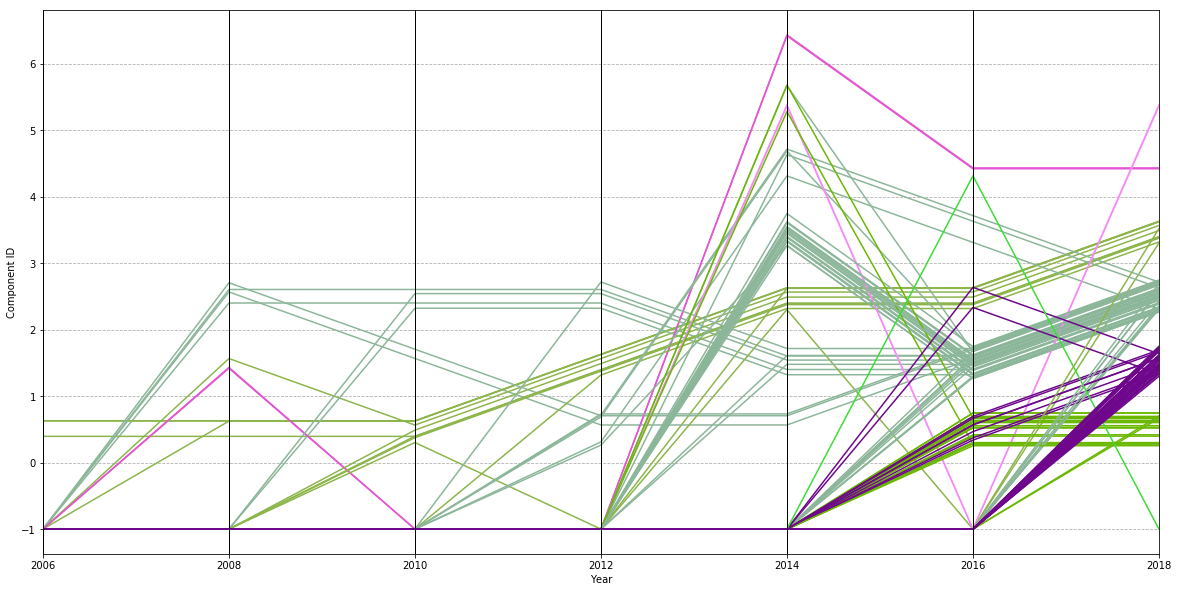

In [12]:
plt = plotter.subtopic_evolution()
plt.show()